In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")
#df = df.head(100)

In [3]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

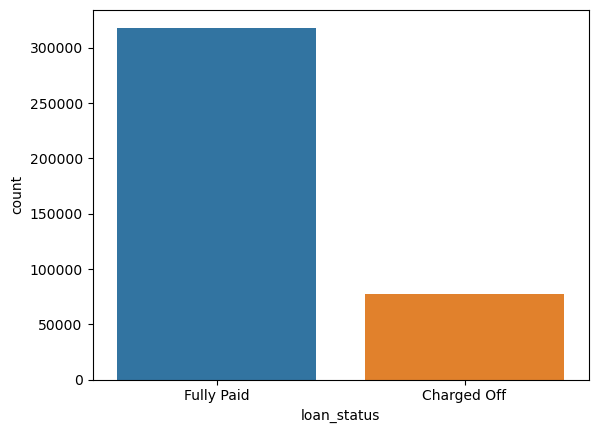

In [5]:
sns.countplot(data=df, x="loan_status")

c:\Users\saras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amnt', ylabel='Count'>

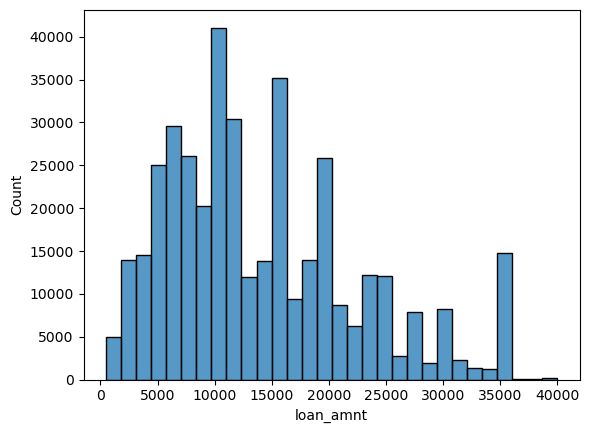

In [6]:
sns.histplot(data=df, x="loan_amnt", bins=30)

In [7]:
#df["term"] = pd.to_numeric(df["term"].apply(lambda x : x.split()[0]))

In [8]:
#dfonlynumber = df.select_dtypes(include='number').corr()

<Axes: >

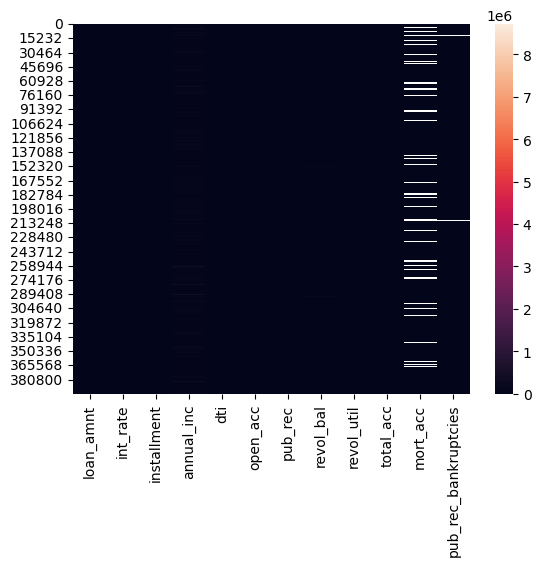

In [9]:
sns.heatmap(data=df.select_dtypes("number"), fmt=".2f", annot=False)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

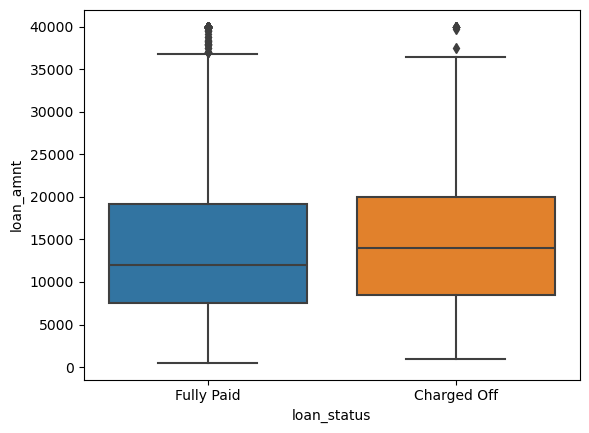

In [10]:
sns.boxplot(data=df, x="loan_status", y="loan_amnt")

In [11]:
df.groupby("loan_status").describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [12]:
grades = list(df["grade"].unique())

In [13]:
grades.sort()

In [14]:
grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
subgrades = list(df["sub_grade"].unique())

In [16]:
subgrades.sort()

In [17]:
subgrades

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

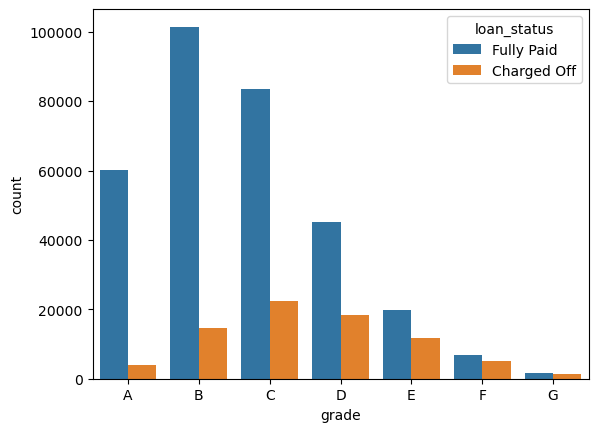

In [18]:
sortedbysubgrade = df.sort_values(by="sub_grade")
sns.countplot(data=sortedbysubgrade, x="grade", hue="loan_status")

In [19]:
#sortedbysubgrade

Text(0.5, 1.0, 'Default-Sized Countplotr')

<Figure size 640x480 with 0 Axes>

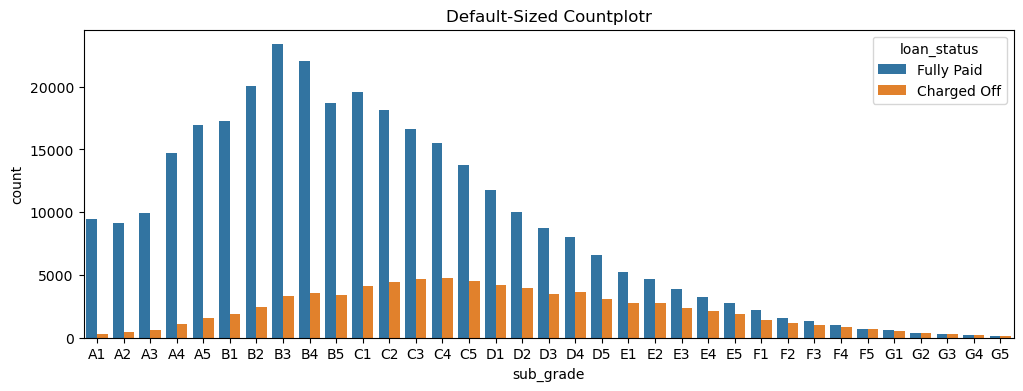

In [20]:
plt.figure()
plt.figure(figsize=(12,4))
sns.countplot(data=sortedbysubgrade, x="sub_grade", hue="loan_status")
plt.title('Default-Sized Countplotr')

In [21]:
subgradefng = ["F1","F2","F3","F4","F5","G1","G2","G3","G4","G5"]

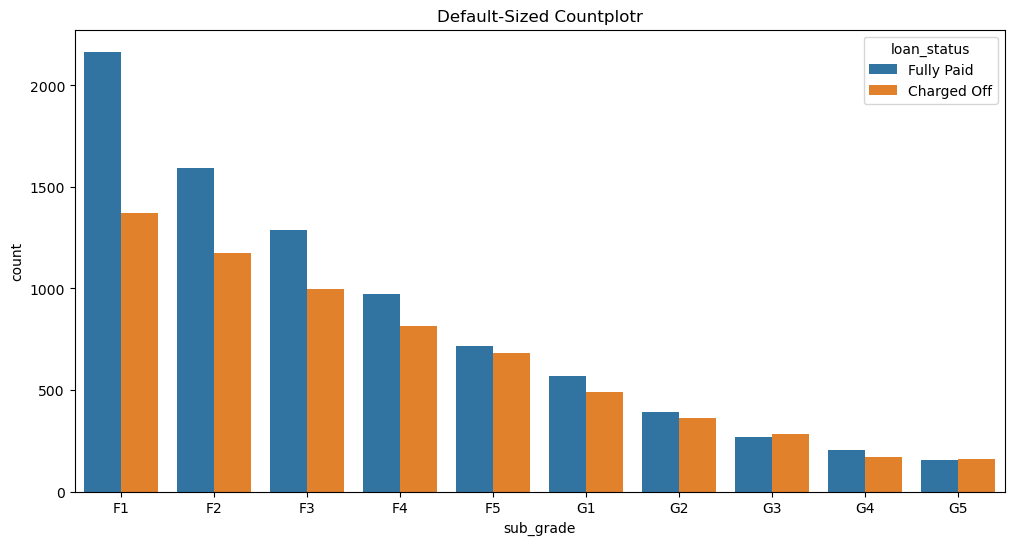

In [22]:
sortedsub = df[(df["grade"]=="F") | (df["grade"]=="G")]

plt.figure(figsize=(12,6))
sns.countplot(data=sortedsub, x="sub_grade", hue="loan_status", order=sorted(sortedsub["sub_grade"].unique()))
plt.title('Default-Sized Countplotr')

plt.show()

In [23]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
pd.get_dummies(data=df, columns=["loan_status"], dtype=int)
#df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Charged Off,loan_status_Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",0,1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",0,1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",0,1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",0,1


In [25]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


<Axes: >

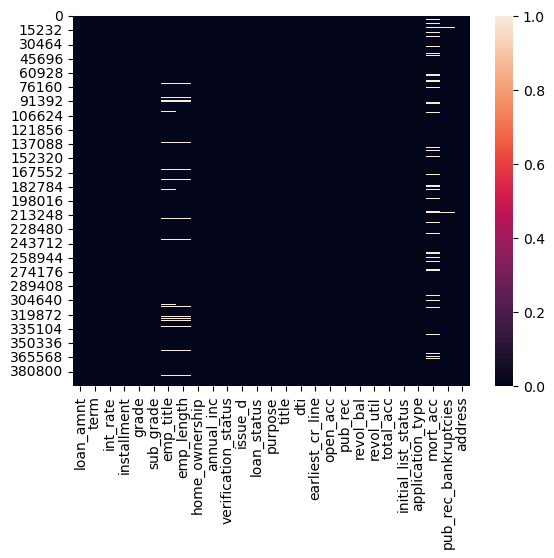

In [26]:
sns.heatmap(df.isna())

In [27]:
round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

In [28]:
#df.drop("title", inplace=True, axis=1)

In [29]:
df.head(1)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


In [30]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [31]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [32]:
df["emp_title"].nunique()


173105

In [33]:
df["emp_title"].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [34]:
df.drop("emp_title", inplace=True, axis=1)

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [36]:
len(df)

396030

In [37]:
np.round((df.isna().sum()/len(df)*100).sort_values(),2)

loan_amnt               0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
dti                     0.00
loan_status             0.00
purpose                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
term                    0.00
issue_d                 0.00
address                 0.00
revol_util              0.07
pub_rec_bankruptcies    0.14
title                   0.44
emp_length              4.62
mort_acc                9.54
dtype: float64

In [38]:
sorted(df["emp_length"].dropna().unique().tolist())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
emp_length_order = [ '< 1 year',
'1 year', 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years',
]

In [40]:
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

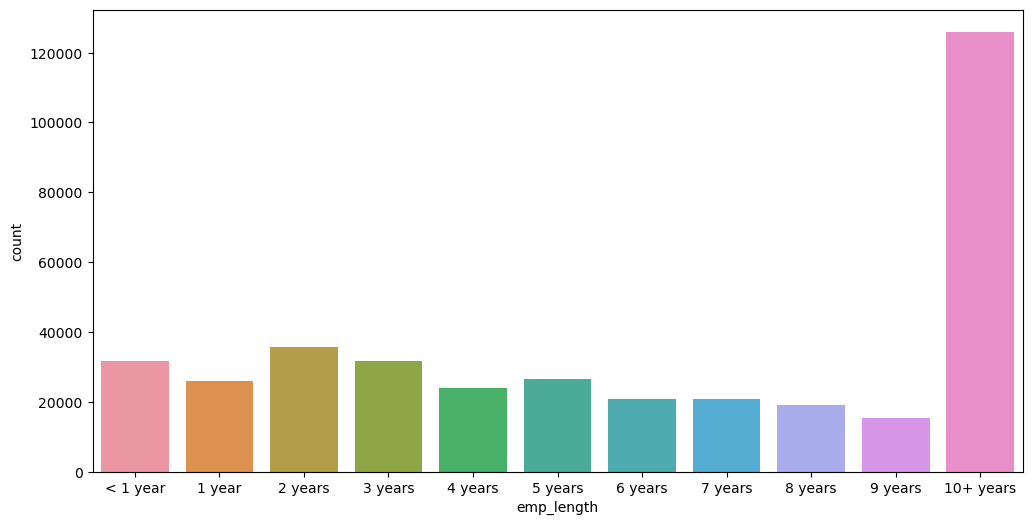

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="emp_length", order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

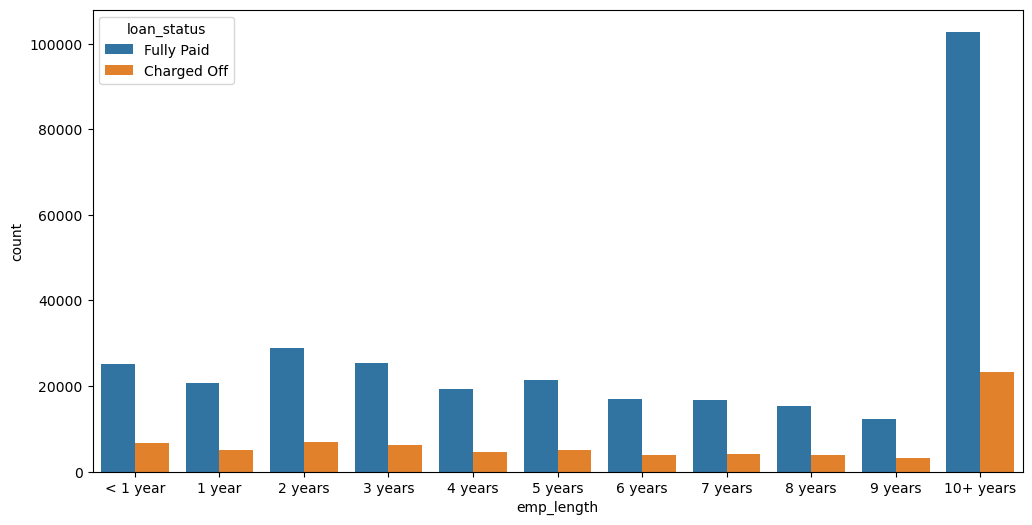

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="emp_length", order=emp_length_order, hue="loan_status")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394274 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [44]:
df.groupby("emp_length")["loan_status"].value_counts()

emp_length  loan_status
1 year      Fully Paid      20728
            Charged Off      5154
10+ years   Fully Paid     102826
            Charged Off     23215
2 years     Fully Paid      28903
            Charged Off      6924
3 years     Fully Paid      25483
            Charged Off      6182
4 years     Fully Paid      19344
            Charged Off      4608
5 years     Fully Paid      21403
            Charged Off      5092
6 years     Fully Paid      16898
            Charged Off      3943
7 years     Fully Paid      16764
            Charged Off      4055
8 years     Fully Paid      15339
            Charged Off      3829
9 years     Fully Paid      12244
            Charged Off      3070
< 1 year    Fully Paid      25162
            Charged Off      6563
Name: count, dtype: int64

In [45]:
fullypaidcount = df[df["loan_status"]=="Fully Paid"].groupby("emp_length")["emp_length"].count()

In [46]:
chargedoffcount = df[df["loan_status"]=="Charged Off"].groupby("emp_length")["emp_length"].count()

In [47]:
emplenbarplot = chargedoffcount/fullypaidcount*100

<Axes: xlabel='emp_length'>

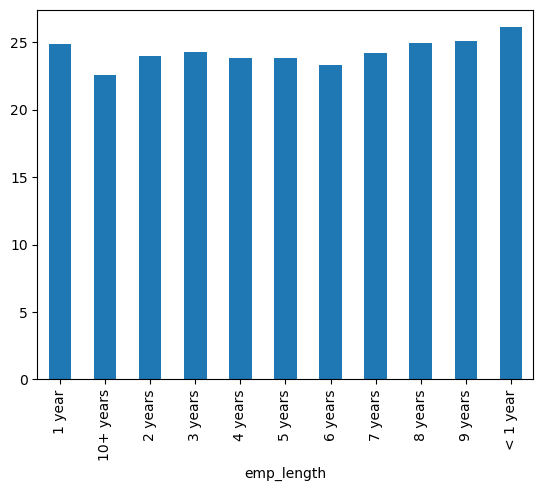

In [48]:
emplenbarplot.plot(kind="bar")

In [49]:
df.drop("emp_length", inplace=True, axis=1)

In [50]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [51]:
df["title"].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [52]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [53]:
df.drop("title", inplace=True, axis=1)

In [54]:
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [55]:
(df.corr(numeric_only=True)["mort_acc"]*100).sort_values(ascending=False)

mort_acc                100.000000
total_acc                38.107187
annual_inc               23.632040
loan_amnt                22.231490
revol_bal                19.492515
installment              19.369381
open_acc                 10.920510
pub_rec_bankruptcies      2.723850
pub_rec                   1.155249
revol_util                0.751414
dti                      -2.543871
int_rate                 -8.258346
Name: mort_acc, dtype: float64

In [56]:
df[df["total_acc"]==34]["mort_acc"].mean()

2.589579158316633

In [57]:
def fillMort_acc(columns):
    mortacc = columns[0]
    totalacc = columns[1]

    if pd.isnull(mortacc):
        val = round(df[df["total_acc"]==totalacc]["mort_acc"].mean())
        #print(f"{mortacc} mort_acc add, {val} is totalacc mean")
        return val
    else:
        return mortacc



In [58]:
df['mort_acc'] = df[["mort_acc","total_acc"]].apply(fillMort_acc,axis=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_9308\2387852890.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mortacc = columns[0]
C:\Users\saras\AppData\Local\Temp\ipykernel_9308\2387852890.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  totalacc = columns[1]


In [59]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  pub_r

In [64]:
df.select_dtypes(exclude='number').head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [65]:
df.drop("grade", axis=1, inplace=True)

In [66]:
df = pd.get_dummies(data=df, columns=["sub_grade"], drop_first=True, prefix="", prefix_sep="", dtype=int)

In [67]:
df.select_dtypes(exclude='number').columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [68]:
df["term"] = df["term"].apply(lambda x : int(x.split()[0]))

In [69]:
df.select_dtypes(exclude='number').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [70]:
df = pd.get_dummies(data=df, columns=["verification_status","application_type",'initial_list_status','loan_status',"purpose"], drop_first=True, dtype=int, prefix="", prefix_sep="")

In [71]:
df.select_dtypes('number').columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL',
       'JOINT', 'w', 'Fully Paid', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'],
      dtype='object')

In [72]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,dti,earliest_cr_line,open_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,26.24,Jun-1990,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER","ANY":"OTHER"})

In [74]:
df = pd.get_dummies(data=df, columns=["home_ownership"], drop_first=True, prefix="", prefix_sep="", dtype=int)

In [75]:
df.select_dtypes(exclude="number").columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [76]:
df["PinCode"] = df["address"].apply(lambda x : int(x[-5:]))

In [77]:
df = pd.get_dummies(data=df, columns=["PinCode"], drop_first=True, dtype=int)

In [78]:
df.select_dtypes(exclude="number").columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [79]:
df.drop(["issue_d"], inplace=True, axis=1)

In [80]:
df.select_dtypes(exclude="number").columns

Index(['earliest_cr_line', 'address'], dtype='object')

In [81]:
df.drop(["address"], inplace=True, axis=1)

In [82]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : int(x.split("-")[1]))

In [83]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [84]:
df.drop('earliest_cr_line', inplace=True, axis=1)

In [85]:
df.select_dtypes(exclude="number").columns

Index([], dtype='object')

In [86]:
#df["purpose"]

In [87]:
from sklearn.model_selection import train_test_split

In [116]:
y = df["Fully Paid"].values

In [117]:
X = df.drop("Fully Paid", axis=1).values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [115]:
X_train.shape

(316175, 78)

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()

In [121]:
scaler.fit(X_train)

MinMaxScaler()

In [122]:
X_train = scaler.transform(X_train)

In [123]:
X_test = scaler.transform(X_test)

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [96]:
model = Sequential()

In [97]:
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))


In [98]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [99]:
model.fit(X_train,y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8587 - loss: 0.3546 - val_accuracy: 0.8869 - val_loss: 0.2691
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8880 - loss: 0.2673 - val_accuracy: 0.8869 - val_loss: 0.2691
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8892 - loss: 0.2618 - val_accuracy: 0.8867 - val_loss: 0.2750
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8876 - loss: 0.2635 - val_accuracy: 0.8869 - val_loss: 0.2769
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8885 - loss: 0.2613 - val_accuracy: 0.8876 - val_loss: 0.2877
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8881 - loss: 0.2607 - val_accuracy: 0.8876 - val_loss: 0.2815
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8874 - loss: 0.2612 - val_accuracy: 0.8870 - val_loss: 0.2982
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8888 - loss: 0.2589 -

In [100]:
from tensorflow.keras.models import load_model

In [101]:
#model.save("Full_data_project_model.h5")


In [102]:
losses = pd.DataFrame(model.history.history)

<Axes: >

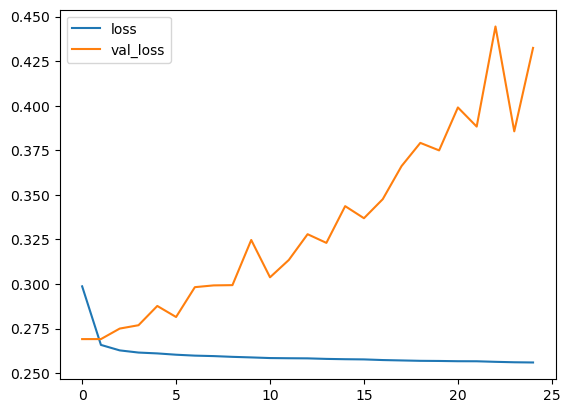

In [103]:
losses[["loss",'val_loss']].plot()

In [104]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score

In [111]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [106]:
Probibility.min()

2.2191462e-31

In [ ]:
#predictions = np.argmax(Probibility, axis=1)

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.83      0.56     15658
           1       0.94      0.72      0.81     63386

    accuracy                           0.74     79044
   macro avg       0.68      0.77      0.69     79044
weighted avg       0.84      0.74      0.76     79044



In [114]:
print(confusion_matrix(y_test,predictions))

[[12925  2733]
 [17945 45441]]
